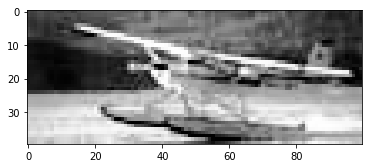

In [4]:
# Plot ad hoc CIFAR10 instances
from matplotlib import pyplot
from scipy.misc import toimage
import matplotlib.image as mpimg
from car_model import Dataset, CarModel
# Simple CNN model for DEMO
import numpy
from keras.utils import np_utils
from keras.models import model_from_json
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import img_to_array, load_img

seed = 42
numpy.random.seed(seed)

img = mpimg.imread('./CarDataset/TrainImages/neg-0.pgm')
pyplot.imshow(img, cmap='gray',vmin=0,vmax=255)
pyplot.show()

In [2]:
# load data
dataset = Dataset('./CarDataset', './CarDataset/car_labels_new.csv')
model = CarModel('./models/car3.h5')

2017-07-20 09:56:55,002 : INFO : shape of training data: (1049, 40, 100, 1)
2017-07-20 09:56:55,003 : INFO : Load data Done!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 3 columns):
Unnamed: 0    1049 non-null int64
files         1049 non-null object
labels        1049 non-null int64
dtypes: int64(2), object(1)
memory usage: 24.7+ KB
finished loading already dumped dataset
<open file './models/car3.json', mode 'r' at 0x7f76e775aa50>
./models/car3.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 40, 100, 32)       320       
_________________________________________________________________
dropout_7 (Dropout)          (None, 40, 100, 32)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 50, 32)        0         
____________________________

In [ ]:
X_train, y_train, picture, label = dataset.getTrainTest()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i].reshape(40, 100), cmap='gray',vmin=0,vmax=255)
    
# show the plot
pyplot.show()

In [ ]:
print model.getEvaluate(picture, label)

In [18]:
"""
PREDICT
"""
import numpy as np
labels = ['no_car', 'car']
PREDICT_NUMBER = 10

for i in range (0, PREDICT_NUMBER):
    pyplot.subplot(330 + 1)
    pyplot.imshow(picture[i].reshape(40, 100), cmap='gray',vmin=0,vmax=255)
    pyplot.show() 
    print "Label: ", labels[np.argmax(label[i])]
    predict = model.predict(picture[i])
    print "Predict: ", labels[np.argmax(predict[-1])]

NameError: name 'picture' is not defined

In [ ]:


mypath = './CarDataset/cars_test/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath, f))]
test_car_data = []
test_car_labels = []
count = 0
for i in range (0, PREDICT_NUMBER):
    img = load_img(join(mypath, onlyfiles[i]), grayscale=True)
    pyplot.imshow(img, cmap='gray',vmin=0,vmax=255)
    pyplot.show()
    arr = img_to_array(img)
    arr = np.reshape(arr, (1,)+arr.shape)
    predict = model.predict(arr)
    
    print "Predict: ", labels[np.argmax(predict[-1])]

In [ ]:
count = 0
for imgfile in onlyfiles:
    img = load_img(join(mypath, imgfile), grayscale=True)
    arr = img_to_array(img)
    arr = np.reshape(arr, (1,)+arr.shape)
    predict = model.predict(arr)
    if np.argmax(predict[-1]) == 1:
        count += 1

In [ ]:
accuracy = float(count) / len(onlyfiles)
print count 
print len(onlyfiles) 
print accuracy

In [ ]:
print count 
print len(onlyfiles) 

In [ ]:
mypath = './CarDataset/TrainImages/'


all_imgs = [ f for f in listdir(mypath) if isfile(join(mypath, f))]
original_car_imgs = [] 
for f in all_imgs:
    if f[:3] == 'pos':
        original_car_imgs.append(f)
        
count = 0
for imgfile in original_car_imgs:
    img = load_img(join(mypath, imgfile), grayscale=True)
    arr = img_to_array(img)
    arr = np.reshape(arr, (1,)+arr.shape)
    predict = model.predict(arr)
    if np.argmax(predict[-1]) == 1:
        count += 1

accuracy = float(count) / len(original_car_imgs)
print count
print accuracy

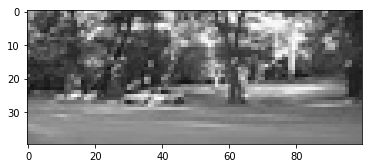

Label: car
Predict:  no_car


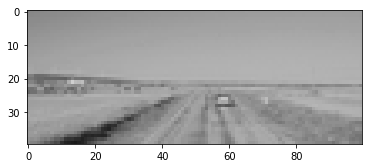

Label: car
Predict:  no_car


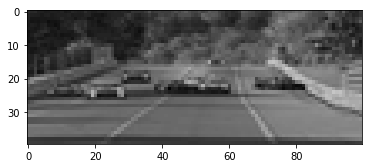

Label: car
Predict:  car


In [21]:
mypath = './CarDataset/'
count = 0
all_imgs = [ f for f in listdir(mypath) if isfile(join(mypath, f))]
for imgfile in all_imgs:
    if imgfile[-3:] == 'jpg':
        img = load_img(join(mypath, imgfile), grayscale=True)
        arr = img_to_array(img)
        arr = numpy.reshape(arr, (1,)+arr.shape)
        predict = model.predict(arr)
        pyplot.imshow(img, cmap='gray',vmin=0,vmax=255)
        pyplot.show()
        print "Label: car" 
        print "Predict: ", labels[np.argmax(predict[-1])]